<a href="https://colab.research.google.com/github/rkarthiksub/MachineLearningNotebooks/blob/master/KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

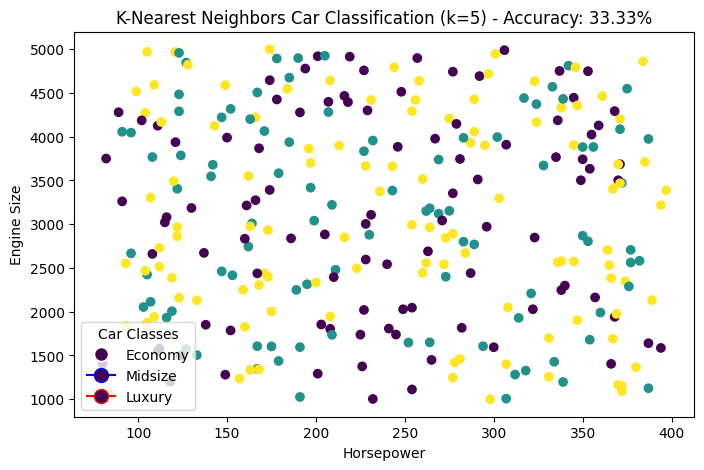

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate random car data (replace with your real data)
np.random.seed(0)
n_samples = 300
horsepower = np.random.randint(80, 400, n_samples)
engine_size = np.random.randint(1000, 5000, n_samples)
fuel_efficiency = np.random.randint(10, 40, n_samples)
car_classes = np.random.choice(['economy', 'midsize', 'luxury'], n_samples)

# Create a DataFrame
data = pd.DataFrame({'Horsepower': horsepower, 'EngineSize': engine_size, 'FuelEfficiency': fuel_efficiency, 'CarClass': car_classes})

# Split the data into features (X) and labels (y)
X = data[['Horsepower', 'EngineSize', 'FuelEfficiency']]
y = data['CarClass']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Plot the results
plt.figure(figsize=(8, 5))
scatter = plt.scatter(data['Horsepower'], data['EngineSize'], c=data['CarClass'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.title(f'K-Nearest Neighbors Car Classification (k={k}) - Accuracy: {accuracy * 100:.2f}%')

# Create a legend for the plot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(0), markersize=10, label='Economy'),
           plt.Line2D([0], [0], marker='o', color='b', markerfacecolor=scatter.cmap(1), markersize=10, label='Midsize'),
           plt.Line2D([0], [0], marker='o', color='r', markerfacecolor=scatter.cmap(2), markersize=10, label='Luxury')]
plt.legend(handles=handles, title='Car Classes')

plt.show()
